# Kitty Classifier Training

Dataset credits:

### Import all the Dependencies

In [33]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy
import numpy as np

### Verify TensorFlow GPU Support

In [2]:
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is NOT AVAILABLE


### Import data into tensorflow dataset object

In [3]:
IMAGE_SIZE = 256
TARGET_SIZE = (256, 256)
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)
train_generator = train_datagen.flow_from_directory(
        "dataset/train",
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4880 images belonging to 20 classes.


In [5]:
train_generator.class_indices

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Bengal': 4,
 'Birman': 5,
 'Bombay': 6,
 'British Shorthair': 7,
 'Egyptian Mau': 8,
 'Exotic Shorthair': 9,
 'Maine Coon': 10,
 'Manx': 11,
 'Norwegian Forest': 12,
 'Persian': 13,
 'Ragdoll': 14,
 'Russian Blue': 15,
 'Scottish Fold': 16,
 'Siamese': 17,
 'Sphynx': 18,
 'Turkish Angora': 19}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Abyssinian',
 'American Bobtail',
 'American Curl',
 'American Shorthair',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Maine Coon',
 'Manx',
 'Norwegian Forest',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Scottish Fold',
 'Siamese',
 'Sphynx',
 'Turkish Angora']

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True,
        preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        shuffle=True
)

Found 700 images belonging to 20 classes.


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    preprocessing_function=lambda x: tf.image.resize(x, TARGET_SIZE)
)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        shuffle=True
)

Found 1420 images belonging to 20 classes.


## Building the Model

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [4]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

NameError: name 'model' is not defined

### Figure out how many steps per epoch:

Training dataset has 4901 images

In [12]:
4901/32

153.15625

Validation dataset has 721 images

In [13]:
721/32

22.53125

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=153,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=23,
    verbose=1,
    epochs=20,
)

Epoch 1/20


153/153 [==============================] - 104s 672ms/step - loss: 2.9656 - accuracy: 0.0742 - val_loss: 2.8884 - val_accuracy: 0.0957
Epoch 2/20
153/153 [==============================] - 93s 609ms/step - loss: 2.8641 - accuracy: 0.1084
Epoch 3/20
153/153 [==============================] - 92s 601ms/step - loss: 2.7933 - accuracy: 0.1408
Epoch 4/20
153/153 [==============================] - 93s 607ms/step - loss: 2.7332 - accuracy: 0.1607
Epoch 5/20
153/153 [==============================] - 93s 609ms/step - loss: 2.6387 - accuracy: 0.1820
Epoch 6/20
153/153 [==============================] - 93s 608ms/step - loss: 2.5597 - accuracy: 0.2107
Epoch 7/20
153/153 [==============================] - 93s 607ms/step - loss: 2.4767 - accuracy: 0.2266
Epoch 8/20
153/153 [==============================] - 93s 607ms/step - loss: 2.3970 - accuracy: 0.2525
Epoch 9/20
153/153 [==============================] - 93s 605ms/step - loss: 2.3154 - accuracy: 0.2613
Epoch 10/20
153/153 [=======

In [27]:
scores = model.evaluate(test_generator)

45/45 [==============================] - 18s 393ms/step - loss: 2.1592 - accuracy: 0.3613


In [28]:
scores

[2.1591951847076416, 0.3612675964832306]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [2]:
history

# Plotting the Accuracy and Loss Curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 20

plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
history


You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [3]:
history.params

NameError: name 'history' is not defined

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.9655959606170654,
 2.864138126373291,
 2.7932610511779785,
 2.7332205772399902,
 2.638662815093994]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.09571428596973419]

In [25]:
acc

[0.07418032735586166,
 0.10840164124965668,
 0.14077869057655334,
 0.16065573692321777,
 0.18196721374988556,
 0.21065573394298553,
 0.22663934528827667,
 0.25245901942253113,
 0.2612704932689667,
 0.29897540807724,
 0.31352460384368896,
 0.3411885201931,
 0.35881146788597107,
 0.37397539615631104,
 0.3954918086528778,
 0.41209015250205994,
 0.4225409924983978,
 0.4415983557701111,
 0.4487704932689667,
 0.46372950077056885]

In [1]:
# Plotting the Accuracy and Loss Curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 20

plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy')
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss')
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

### Run prediction on a sample image

In [32]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'labels_batch' is not defined

### Write a function for inference

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 24ms/step


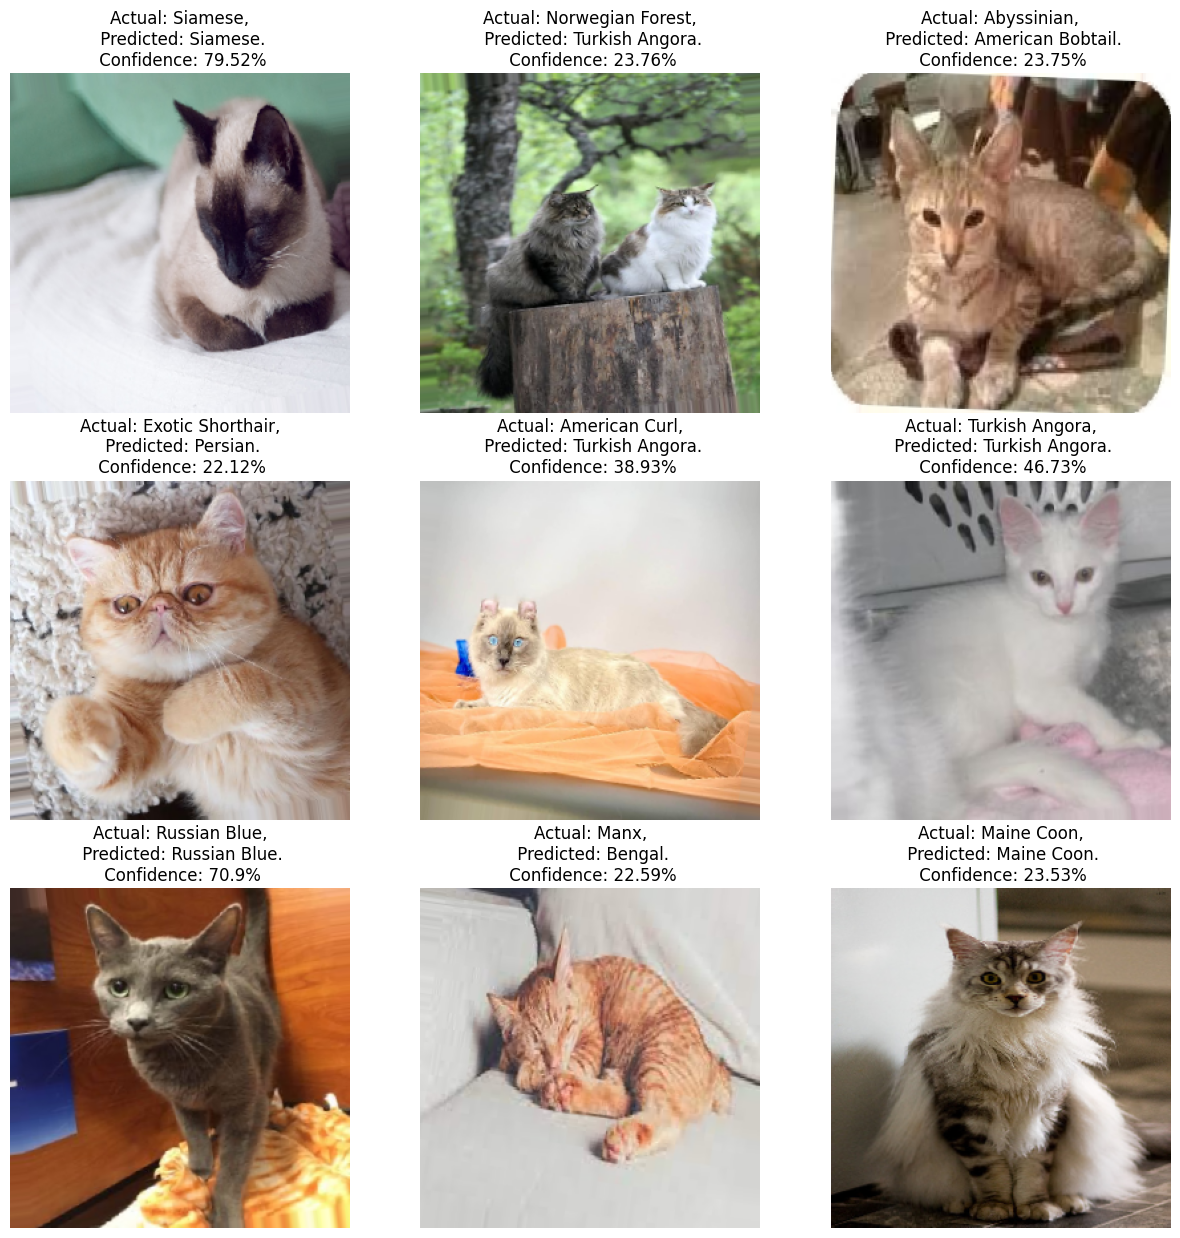

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [37]:
model.save("../cats.h5")

C:\Users\Oles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  
